In [1]:
from sklearn import linear_model 
import numpy as np
x = np.array([[0,1],[3,-2],[2,3]])
y=np.array([0.5, 0.3, 0.9])
reg = linear_model.LinearRegression()
reg.fit(x, y)
print("intercept_:", reg.intercept_)
print("coef_:", reg.coef_)

reg.predict([[1,2], [-3,2]])

intercept_: 0.366666666667
coef_: [ 0.06666667  0.13333333]


array([ 0.7       ,  0.43333333])

dim 1 :
intercept_: 1.64829508307
coef_: [-0.44144429]
dim 3 :
intercept_: 1.78140362443
coef_: [ 2.86130815 -2.3805017   0.32784913]
dim 6 :
intercept_: -86.5689280573
coef_: [ -33.36229447  215.35717307 -261.34048651  206.0813665   -89.82922926
   16.47968267]
dim 12 :
intercept_: 21755926.765
coef_: [  4.90711373e+06  -1.65320157e+08   8.68925182e+08  -2.87997935e+09
   5.81677409e+09  -6.70784724e+09   2.78781697e+09   3.43391672e+09
  -6.26201606e+09   4.42218537e+09  -1.56512904e+09   2.28915820e+08]


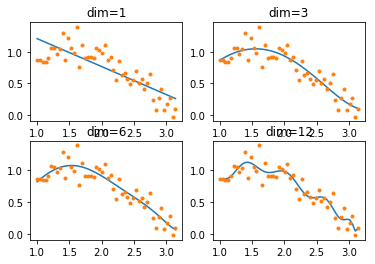

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_data(nDim):
    x0 = np.linspace(1, np.pi, 50)
    x = np.vstack([[x0, ], [i**x0 for i in range(2, nDim+1)]]) 
    y = np.sin(x0) + np.random.normal(0, 0.15, len(x0))
    return x.transpose(), y


x, y = make_data(12)

def linear_regression():
    
    dims = [1,3,6,12]
    
    for idx, i in enumerate(dims):
        
        plt.subplot(2, len(dims)/2, idx+1)
        reg = linear_model.LinearRegression()
        
        sub_x = x[:, 0:i]
        reg.fit(sub_x, y)
        plt.plot(x[:,0], reg.predict(sub_x))
        plt.plot(x[:,0], y, ".")
        plt.title("dim=%s"%i)
        
        print("dim %d :"%i)
        print("intercept_: %s"% (reg.intercept_,))
        print("coef_: %s"% (reg.coef_,))
        
plt.show()

linear_regression()
        
        

/Users/magirui/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.7783825751298e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/magirui/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.1448708131209914e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


alpha 1.000000e-15:
intercept_: -111.584207848
coef_: [  -22.835067     498.78186699 -1174.59356291  1453.83018451  -663.113036
  -218.61365138    70.25604246   327.19226684  -148.57155443   -97.63650152
    72.23034991    -9.7483322 ]
alpha 1.000000e-12:
intercept_: -93.596064372
coef_: [  -16.77671537   439.58130082 -1068.635219    1343.35453268  -620.38972826
  -202.00522817    65.79150455   306.57708503  -138.53447482   -92.71512859
    67.97580911    -9.03659938]
alpha 1.000000e-05:
intercept_: -2.35629470426
coef_: [ 1.88895183  2.09384103  1.32186837 -0.82245472 -1.89241465 -1.16006837
  0.55592072  1.7736531   1.33135074 -0.71155075 -2.29961829  1.26573079]
alpha 1.000000e+00:
intercept_: 0.668122365929
coef_: [ 0.07348483  0.06066438  0.07365471  0.04801041  0.00767075 -0.02603332
 -0.03966222 -0.02941411 -0.00158196  0.02751386  0.03181368 -0.02410527]


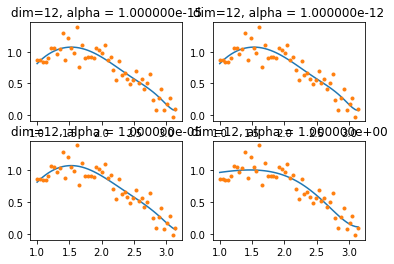

In [19]:
#岭回归
def ridge_regression():
    
    #α参数
    alphas = [1e-15, 1e-12, 1e-5, 1,]
    for idx, i in enumerate(alphas):
        
        # plt.subplot(2,2,1) #要生成两行两列，这是第一个图plt.subplot('行','列','编号')
        plt.subplot(2, len(alphas)/2 , idx + 1 )
        reg = linear_model.Ridge(alpha=i) #岭回归模型
        
        sub_x = x[:, 0:12]
        reg.fit(sub_x, y)
        plt.plot(x[:,0], reg.predict(sub_x))
        plt.plot(x[:,0], y, ".")
        plt.title("dim=12, alpha = %e" %i)
        
        print("alpha %e:" %i)
        print("intercept_: %s" %(reg.intercept_,))
        print("coef_: %s" %(reg.coef_,))
    plt.show()
    
ridge_regression()        

#相比OLS模型的12维特征模型结果,模型参数w显著降低，并且α参数的大小与训练结果的
#回归参数呈反向关系:a越大，回归系数越小，模型约平缓

/Users/magirui/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha 1.000000e-10:
intercept_: 0.897673394064
coef_: [  1.48248681e+00  -7.02377998e-01  -3.20362073e-02  -7.66335218e-04
   1.24852963e-03   9.50945515e-04   6.02531420e-04   3.75999148e-04
   2.38957601e-04   1.55833691e-04   1.04328229e-04   7.15825343e-05]
alpha 1.000000e-03:
intercept_: 0.666168947354
coef_: [  7.89175593e-01  -7.85070224e-02  -1.13381499e-01  -9.49334417e-03
  -2.26882724e-04   3.98731948e-04   7.16700893e-04   4.89799681e-04
   3.30911128e-04   2.26587350e-04   1.58198652e-04   1.12698887e-04]
alpha 1.000000e-01:
intercept_: 1.08265404757
coef_: [ 0.          0.         -0.         -0.         -0.         -0.00498669
 -0.00207061 -0.00015786 -0.         -0.          0.00012374  0.00045746]
alpha 1.000000e+00:
intercept_: 0.979493676718
coef_: [-0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.00025925 -0.0009499  -0.         -0.         -0.        ]


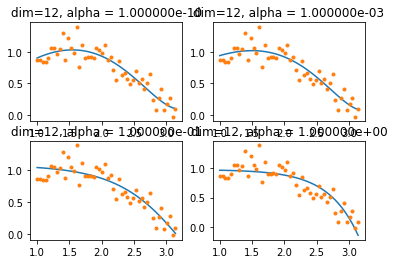

In [28]:
#Lasso回归
def lasso_regression():
    
    alphas = [1e-10, 1e-3, 1e-1 ,1]
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        reg = linear_model.Lasso(alpha=i)
        sub_x = x[:, 0:12]
        reg.fit(sub_x, y)
        plt.plot(x[:,0], reg.predict(sub_x))
        plt.plot(x[:,0], y, ".")
        plt.title("dim=12, alpha = %e" %i)
        
        print("alpha %e:" %i)
        print("intercept_: %s" %(reg.intercept_,))
        print("coef_: %s" %(reg.coef_,))
    plt.show()
    
lasso_regression()        